<a href="https://colab.research.google.com/github/nisaac21/TensorFlow/blob/main/Reinforcement_Learning_Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Reinforcement Learning**

The idea here is that the algorithm learns by being thrown into an environment and interacting with said environment. This is how we learn as humans. Let's say we play a game, make mistakes, and then learn to do something different until we create a strategy that works for us.

##Terminology

* *Environment*: What we are trying to solve. If we are training Mario to play a level, the environment is the level. 
* *Agent*: Entity exploring the environment. In the Mario example, Mario himself is the agent
* *State*: At all times, our agent is in a state. Many different states within an environment. Most common state is location
* *Action*: Any interaction between the agent and the state. This is how the agent 'explores' the environment
* *Reward*: What the agent is trying to maximize in the environment. Every action returns some magnitude of a reward (positive or negative).
  * The programmer comes up with the reward, analogous to a loss function. 


##**Q-Learning**

Here, we create a table where all the rows represent a state, and every column represents an action that could be taken. Any entry within the matrix (say [m,n]) represents the reward when they are in state m, and take action n. 

Let's look at a quick example. 

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

| A1  | A2  | A3  | A4  |
|:--: |:--: |:--: |:--: |
|  0  |  0  | 10  |  5  |
|  5  | 10  |  0  |  0  |
| 10  |  5  |  0  |  0  |

If that was our Q-Table/matrix then the following would be the preffered actions in each state.

> State 1: A3

> State 2: A2

> State 3: A1

Let's look at another example

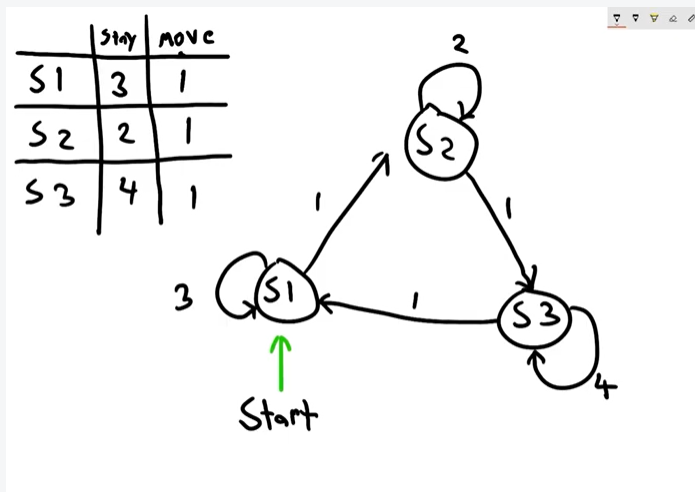

The triangle flow represents the states and actions the agent can take, with each integer representing the reward. 
Let's say the agent starts in S1. We can stay and get a reward of 3, or move and get a reward of 1. 

But what if we wanted the agent to recieve the max reward posible? Then we would want to get to S3 and stay. However, if we start in S1, our agent is going to keep staying because it doesn't realize it can move and get to S3 for a larger reward. We have to implement complexity in order to realize this. The agent needs the ability to explore the environment not just based on past experiences. 

##Learning the Q Table

We don't want to create the Q table by just exploring the environment and always taking the max reward action. We first start with a blank Q Table, filled with all 0's.

Then the agent needs to know what action to take when its learning the environment
1. Randomly picking a valid action
2. Using the current Q-Table to find best action

We need a mix of the two. 

##Updating Q-Values

$ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $



- $\alpha$ stands for the **Learning Rate**
  * This constant is responsible for making sure our agent doesn't over updates the Q table. This variable puts a cap on max change on each Q-table update

- $\gamma$ stands for the **Discount Factor**
  * This determines how much focus is put on the current state. A higher $\gamma$ means we are more focused on future states than current states. 

We are taking the current state, and adding some value that either adds or subtracts from our state, determining if we should take that action. 

What we are adding is $\alpha$  * (reward + $\gamma$ * maximum reward agent could get in the new state agent moved into). 
  * This part of the formula is trying to factor in moving to the next state, to determine best action to take. This is the agent trying to learn transition, or looking ahead. 

Finally we subtract the current state action in order to get the change for the update, not just the ttoal amount. 

##**Example**

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular enviornment from the [Open AI Gym](https://gym.openai.com/). The Open AI Gym was developed so programmers could practice machine learning using unique enviornments. Intersting fact, Elon Musk is one of the founders of OpenAI!

This is useful for training reinforcement algorithms

In [4]:
import gym

In [5]:
# Setting up using environment
env = gym.make('FrozenLake-v1')

Gym works by having an observation space (environment) and action space (how many actions we can take in any given state

In [6]:
print(env.observation_space.n) # num of stats
print(env.action_space.n) # num of actions

16
4


In [7]:
env.reset() # reset env to default state

0

In [8]:
action = env.action_space.sample() # get a random action
action

1

In [9]:
new_state, reward, done, info = env.step(action) # take action and return some info
# int new_state = what state we move into next
# float reward = what reward did we recieve?
# bool done = true if we have lost or won  

In [12]:
env.render() # GUI for environment - slows it down drastically

Here we can see the frozen lake enviornment. 
* S is the state
* G is the goal (where we want to end up)
* H is a hole (have to avoid or loose)
* F is where we can step

##Building the Q-Table


In [14]:
import gym
import numpy as np
import time 

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [15]:
Q = np.zeros((STATES, ACTIONS))
Q = np.zeros((3,3))

Constants we need to define

In [16]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # how many states before we stop agent
# prevents agent from being stuck between two states, or moving in a ciruclar pattern

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

##Picking an Action

We have two options, picking a random action or using current Q-Table for best action

In [17]:
epsilon = 0.9 # start with a 90% chance of picking random action
# as we explore, we will gradually reduce epsilon

if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

Updating...

In [19]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

##Creating the Model

In [21]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
# typically more episodes = better model 
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [22]:
rewards = [] # storing rewards to graph later
for episode in range(EPISODES):

  state = env.reset() # reset the state, exploring again
  # notice that the Q table is not reset though. We can improve on it
  # from the last episode
  
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    # updating the Q table 
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.58166206e-01 5.86561946e-03 6.57602890e-03 7.19981655e-03]
 [6.72612662e-04 1.18434993e-03 7.87107333e-04 1.06970240e-01]
 [8.90094548e-02 1.83175203e-03 7.72435887e-04 2.69291080e-03]
 [1.22667720e-03 7.50691665e-04 5.45868660e-04 2.77809150e-03]
 [3.62056571e-01 3.96805877e-03 1.35472756e-03 3.82982886e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.81621877e-02 1.90609640e-06 3.84631047e-06 2.33296271e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.93128345e-05 2.47893919e-03 1.12009282e-03 6.44253978e-01]
 [3.25371246e-03 8.05221832e-01 1.60545779e-03 1.33426307e-03]
 [2.97235687e-01 3.42898905e-05 5.14288629e-05 4.93523166e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.17588256e-02 9.43458543e-02 9.18326374e-01 9.63529518e-02]
 [1.18965755e-01 1.84597782e-01 1.51178615e-01 8.68259577e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

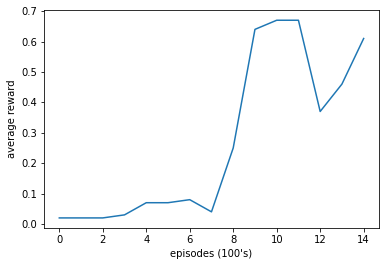

In [23]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 


plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

This shows us average reward we have per step taken. Remember, we get 1 if we move to a valid step. Otherwise, we get 0. 

In [24]:
def get_reward(opp_play, my_play):
  # Opp_play, my_play is a string 'R', 'P', 'S'
  reward = 0
  ideal_play = {"R" : "P", 
                "P" : "S", 
                "S" : "R"}
  if ideal_play[opp_play] == my_play:
    reward = 1
  elif ideal_play[my_play] == opp_play:
    reward = -1

  return reward 